In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
# import tensorflow.compat.v1 as tf
# tf.compat.v1.disable_eager_execution()
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.activations import linear, relu, sigmoid
%matplotlib widget
from matplotlib.widgets import Slider
from lab_utils_common import dlc
from autils import plt_act_trio
from lab_utils_relu import *
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)


<a name="2"></a>
## 2 - ReLU Activation
This week, a new activation was introduced, the Rectified Linear Unit (ReLU). 
$$ a = max(0,z) \quad\quad\text {# ReLU function} $$

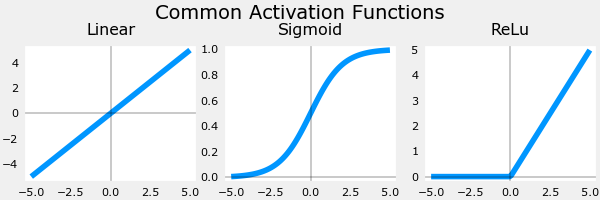

In [2]:
plt_act_trio()

<img align="right" src="./images/C2_W2_ReLu.png"     style=" width:380px; padding: 10px 20px; " >
The example from the lecture on the right shows an application of the ReLU. In this example, the derived "awareness" feature is not binary but has a continuous range of values. The sigmoid is best for on/off or binary situations. The ReLU provides a continuous linear relationship. Additionally it has an 'off' range where the output is zero.     
The "off" feature makes the ReLU a Non-Linear activation. Why is this needed? Let's examine this below. 

### Why Non-Linear Activations?  
<img align="left" src="./images/C2_W2_ReLU_Graph.png"     style=" width:250px; padding: 10px 20px; " > The function shown is composed of linear pieces (piecewise linear). The slope is consistent during the linear portion and then changes abruptly at transition points. At transition points, a new linear function is added which, when added to the existing function, will produce the new slope. The new function is added at transition point but does not contribute to the output prior to that point. The Non-linear activation function is responsible for disabling the input prior to and sometimes after the transition points. The following exercise provides a more tangible example.

The exercise will use the network below in a regression problem where you must model a piecewise linear target :
<img align="center" src="./images/C2_W2_ReLU_Network.png"     style=" width:650px; padding: 10px 20px; ">  
The network has 3 units in the first layer. Each will be responsible for one piece of the target. Unit 0 is pre-programmed and fixed to map the the first segment. You will modify weights and biases in unit 1 and 2 to model the 2nd and 3rd segment. The output unit is also fixed and simply sums the outputs of the first layer.  

Using the sliders below, modify weights and bias to match the target. 
Hints: Start with `w1` and `b1` and leave `w2` and `b2` zero until you match the 2nd segment. Clicking rather than sliding is quicker.  If you have trouble, don't worry, the text below will describe this in more detail.

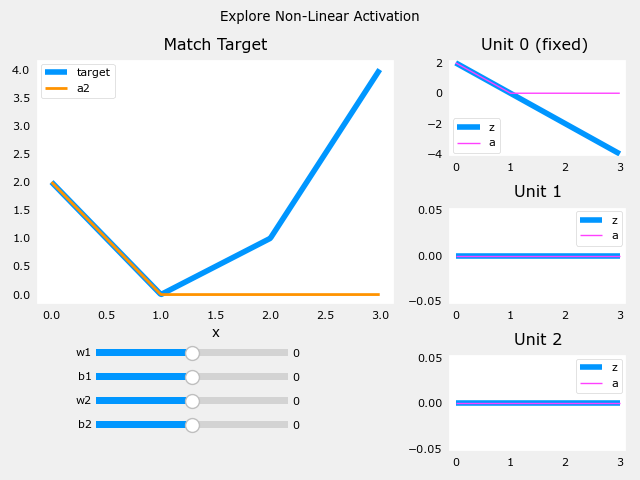

In [3]:
_ = plt_relu_ex()

 
The goal of this exercise is to appreciate how the ReLU's non-linear behavior provides the needed ability to turn functions off until they are needed. Let's see how this worked in this example.
<img align="right" src="./images/C2_W2_ReLU_Plot.png"     style=" width:600px; padding: 10px 20px; "> 
The plots on the right contain the output of the units in the first layer.   
Starting at the top, unit 0 is responsible for the first segment marked with a 1. Both the linear function $z$ and the function following the ReLU $a$ are shown. You can see that the ReLU cuts off the function after the interval [0,1]. This is key as it prevents from interfering with the following segment. 

Unit 1 is responsible for the 2nd segment. Here the ReLU kept this unit quiet until after x is 1. Since the first unit is not contributing, the slope for unit 1, $w^{[1]}_1$, is just the slope of the target line. The bias must be adjusted to keep the output negative until x has reached 1.

Unit 2 is responsible for the 3rd segment. The ReLU again zeros the output until x reaches the right value.The slope of the unit, $w^{[1]}_2$, must be set so that the sum of unit 1 and 2 have the desired slope. The bias is again adjusted to keep the output negative until x has reached 2.

The "off" or disable feature  of the ReLU activation enables models to stitch together linear segments to model complex non-linear functions.


# =======End of new Material===

## New Activation
This week a new activation was introduced, the Rectified Linear Unit (ReLU). 

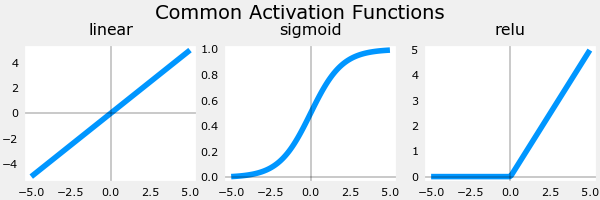

In [4]:
def plt_act_trio():
    X = np.linspace(-5,5,100)
    fig,ax = plt.subplots(1,3, figsize=(6,2))
    widgvis(fig)
    ax[0].plot(X,tf.keras.activations.linear(X))
    ax[0].axvline(0, lw=0.3, c="black")
    ax[0].axhline(0, lw=0.3, c="black")
    ax[0].set_title("linear")
    ax[1].plot(X,tf.keras.activations.sigmoid(X))
    ax[1].axvline(0, lw=0.3, c="black")
    ax[1].axhline(0, lw=0.3, c="black")
    ax[1].set_title("sigmoid")
    ax[2].plot(X,tf.keras.activations.relu(X))
    ax[2].axhline(0, lw=0.3, c="black")
    ax[2].axvline(0, lw=0.3, c="black")
    ax[2].set_title("relu")
    fig.suptitle("Common Activation Functions", fontsize=14)
    fig.tight_layout(pad=0.2)
    plt.show()
plt_act_trio()

<right images>
    The example on the right shows an application of the ReLu. In this example, the "awareness" feature is not binary but has a range that varies from 0 to a larger value. The sigmoid is best for on/off or binary situations. The ReLu provides a linear relationship And an 'off' range where the output is zero. The "off" feature makes the ReLu a Non-Linear activation. Why is this needed? Let's examine this with the example below.

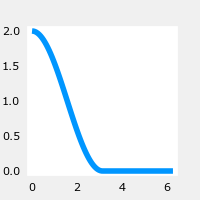

In [5]:
X = np.linspace(0,2*np.pi, 100)
y = np.cos(X)+1
y[50:100]=0
fig,ax = plt.subplots(1,1, figsize=(2,2))
widgvis(fig)
ax.plot(X,y)
plt.show()

In [6]:
w10 = np.array([[-1]])
b10 = np.array([2.6])
d10 = Dense(1, activation = "linear", input_shape = (1,), weights=[w10,b10])
z10 = d10(X.reshape(-1,1))
a10 = relu(z10)

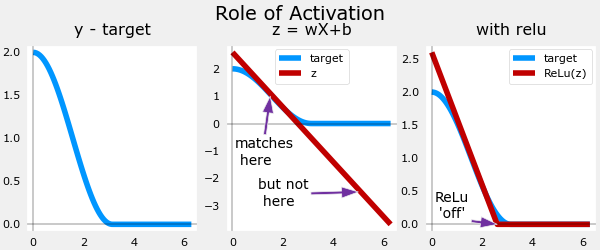

In [7]:
def plt_act1(y,z,a):
    fig,ax = plt.subplots(1,3, figsize=(6,2.5))
    widgvis(fig)
    ax[0].plot(X,y,label="target")
    ax[0].axvline(0, lw=0.3, c="black")
    ax[0].axhline(0, lw=0.3, c="black")
    ax[0].set_title("y - target")
    ax[1].plot(X,y, label="target")
    ax[1].plot(X,z, c=dlc["dldarkred"],label="z")
    ax[1].axvline(0, lw=0.3, c="black")
    ax[1].axhline(0, lw=0.3, c="black")
    ax[1].set_title("z = wX+b")
    ax[1].legend(loc="upper center")
    ax[2].plot(X,y, label="target")
    ax[2].plot(X,a, c=dlc["dldarkred"],label="ReLu(z)")
    ax[2].axhline(0, lw=0.3, c="black")
    ax[2].axvline(0, lw=0.3, c="black")
    ax[2].set_title("with relu")
    ax[2].legend()
    fig.suptitle("Role of Activation", fontsize=14)
    fig.tight_layout(pad=0.2)
    return(ax)


def plt_add_notation(ax):
    ax[1].annotate(text = "matches\n here", xy =(1.5,1.0), 
                   xytext = (0.1,-1.5), fontsize=10,
                  arrowprops=dict(facecolor=dlc["dlpurple"],width=2, headwidth=8))
    ax[1].annotate(text = "but not\n here", xy =(5,-2.5), 
                   xytext = (1,-3), fontsize=10,
                  arrowprops=dict(facecolor=dlc["dlpurple"],width=2, headwidth=8))
    ax[2].annotate(text = "ReLu\n 'off'", xy =(2.6,0), 
                   xytext = (0.1,0.1), fontsize=10,
                  arrowprops=dict(facecolor=dlc["dlpurple"],width=2, headwidth=8))
    
ax = plt_act1(y,z10,a10)
plt_add_notation(ax)

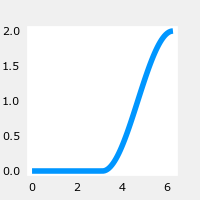

In [8]:
X = np.linspace(0,2*np.pi, 100)
y = np.cos(X)+1
y[0:49]=0
fig,ax = plt.subplots(1,1, figsize=(2,2))
widgvis(fig)
ax.plot(X,y)
plt.show()

array([<AxesSubplot: title={'center': 'y - target'}>,
       <AxesSubplot: title={'center': 'z = wX+b'}>,
       <AxesSubplot: title={'center': 'with relu'}>], dtype=object)

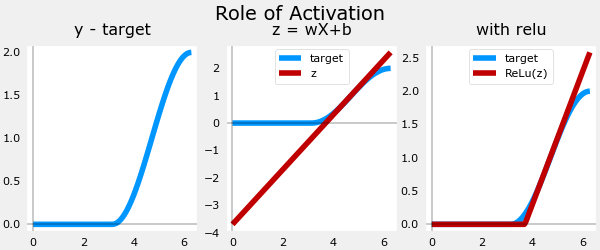

In [9]:
w11 = np.array([[1]])
b11 = np.array([-3.7])
d11 = Dense(1, activation = "linear", input_shape = (1,), weights=[w11,b11])
z11 = d11(X.reshape(-1,1))
a11 = relu(z11)
plt_act1(y,z11,a11)

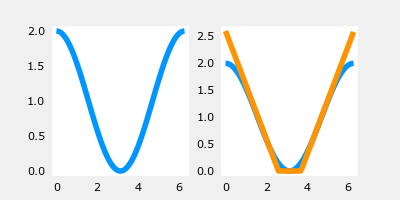

In [10]:
X = np.linspace(0,2*np.pi, 100)
y = np.cos(X)+1
X=X.reshape(-1,1)
yhat = relu(d10(X)) + relu(d11(X))

fig,ax = plt.subplots(1,2, figsize=(4,2))
widgvis(fig)
ax[0].plot(X,y)
ax[1].plot(X,y)
ax[1].plot(X,yhat)
plt.show()

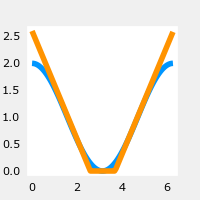

In [11]:
X=X.reshape(-1,1)
yhat = relu(d10(X)) + relu(d11(X))
fig,ax = plt.subplots(1,1, figsize=(2,2))
widgvis(fig)
ax.plot(X,y)
ax.plot(X,yhat)
plt.show()

In [12]:
model = Sequential(
    [ 
        d10,
        tf.keras.layers.Activation("relu"),
        d11,
        tf.keras.layers.Activation("relu"),
        Dense(1, activation = 'linear')
    ]
)
model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.legacy.Adam(0.1),
)

model.fit(
    X,y,
    epochs=1000
)

Epoch 1/1000
4/4 [==============================] - 0s 1ms/step - loss: 1.3421
Epoch 2/1000
4/4 [==============================] - 0s 524us/step - loss: 0.7783
Epoch 3/1000
4/4 [==============================] - 0s 535us/step - loss: 0.5325
Epoch 4/1000
4/4 [==============================] - 0s 634us/step - loss: 0.5118
Epoch 5/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.5542
Epoch 6/1000
4/4 [==============================] - 0s 701us/step - loss: 0.5620
Epoch 7/1000
4/4 [==============================] - 0s 704us/step - loss: 0.5357
Epoch 8/1000
4/4 [==============================] - 0s 608us/step - loss: 0.5120
Epoch 9/1000
4/4 [==============================] - 0s 757us/step - loss: 0.5053
Epoch 10/1000
4/4 [==============================] - 0s 702us/step - loss: 0.5292
Epoch 11/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.5438
Epoch 12/1000
4/4 [==============================] - 0s 647us/step - loss: 0.5445
Epoch 13/1000
4/4 [============

2023-04-25 20:19:09.534751: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


4/4 [==============================] - 0s 764us/step - loss: 0.5122
Epoch 15/1000
4/4 [==============================] - 0s 776us/step - loss: 0.5126
Epoch 16/1000
4/4 [==============================] - 0s 666us/step - loss: 0.5203
Epoch 17/1000
4/4 [==============================] - 0s 679us/step - loss: 0.5170
Epoch 18/1000
4/4 [==============================] - 0s 852us/step - loss: 0.5144
Epoch 19/1000
4/4 [==============================] - 0s 630us/step - loss: 0.5119
Epoch 20/1000
4/4 [==============================] - 0s 686us/step - loss: 0.5066
Epoch 21/1000
4/4 [==============================] - 0s 601us/step - loss: 0.5056
Epoch 22/1000
4/4 [==============================] - 0s 598us/step - loss: 0.5055
Epoch 23/1000
4/4 [==============================] - 0s 846us/step - loss: 0.5050
Epoch 24/1000
4/4 [==============================] - 0s 605us/step - loss: 0.5052
Epoch 25/1000
4/4 [==============================] - 0s 580us/step - loss: 0.5054
Epoch 26/1000
4/4 [===========

4/4 [==============================] - 0s 652us/step - loss: 0.5067
Epoch 114/1000
4/4 [==============================] - 0s 663us/step - loss: 0.5079
Epoch 115/1000
4/4 [==============================] - 0s 613us/step - loss: 0.5096
Epoch 116/1000
4/4 [==============================] - 0s 776us/step - loss: 0.5100
Epoch 117/1000
4/4 [==============================] - 0s 750us/step - loss: 0.5060
Epoch 118/1000
4/4 [==============================] - 0s 589us/step - loss: 0.5051
Epoch 119/1000
4/4 [==============================] - 0s 561us/step - loss: 0.5049
Epoch 120/1000
4/4 [==============================] - 0s 602us/step - loss: 0.5083
Epoch 121/1000
4/4 [==============================] - 0s 596us/step - loss: 0.5054
Epoch 122/1000
4/4 [==============================] - 0s 798us/step - loss: 0.5071
Epoch 123/1000
4/4 [==============================] - 0s 605us/step - loss: 0.5218
Epoch 124/1000
4/4 [==============================] - 0s 653us/step - loss: 0.5176
Epoch 125/1000
4/4 

4/4 [==============================] - 0s 689us/step - loss: 0.5068
Epoch 212/1000
4/4 [==============================] - 0s 573us/step - loss: 0.5081
Epoch 213/1000
4/4 [==============================] - 0s 618us/step - loss: 0.5066
Epoch 214/1000
4/4 [==============================] - 0s 607us/step - loss: 0.5045
Epoch 215/1000
4/4 [==============================] - 0s 547us/step - loss: 0.5046
Epoch 216/1000
4/4 [==============================] - 0s 720us/step - loss: 0.5093
Epoch 217/1000
4/4 [==============================] - 0s 829us/step - loss: 0.5072
Epoch 218/1000
4/4 [==============================] - 0s 604us/step - loss: 0.5077
Epoch 219/1000
4/4 [==============================] - 0s 569us/step - loss: 0.5069
Epoch 220/1000
4/4 [==============================] - 0s 534us/step - loss: 0.5095
Epoch 221/1000
4/4 [==============================] - 0s 651us/step - loss: 0.5101
Epoch 222/1000
4/4 [==============================] - 0s 804us/step - loss: 0.5071
Epoch 223/1000
4/4 

4/4 [==============================] - 0s 631us/step - loss: 0.5044
Epoch 310/1000
4/4 [==============================] - 0s 551us/step - loss: 0.5114
Epoch 311/1000
4/4 [==============================] - 0s 502us/step - loss: 0.5069
Epoch 312/1000
4/4 [==============================] - 0s 550us/step - loss: 0.5065
Epoch 313/1000
4/4 [==============================] - 0s 857us/step - loss: 0.5206
Epoch 314/1000
4/4 [==============================] - 0s 723us/step - loss: 0.5289
Epoch 315/1000
4/4 [==============================] - 0s 555us/step - loss: 0.5296
Epoch 316/1000
4/4 [==============================] - 0s 565us/step - loss: 0.5076
Epoch 317/1000
4/4 [==============================] - 0s 554us/step - loss: 0.5079
Epoch 318/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.5292
Epoch 319/1000
4/4 [==============================] - 0s 613us/step - loss: 0.5361
Epoch 320/1000
4/4 [==============================] - 0s 576us/step - loss: 0.5109
Epoch 321/1000
4/4 [=

4/4 [==============================] - 0s 563us/step - loss: 0.5261
Epoch 408/1000
4/4 [==============================] - 0s 584us/step - loss: 0.5199
Epoch 409/1000
4/4 [==============================] - 0s 731us/step - loss: 0.5032
Epoch 410/1000
4/4 [==============================] - 0s 872us/step - loss: 0.5219
Epoch 411/1000
4/4 [==============================] - 0s 612us/step - loss: 0.5284
Epoch 412/1000
4/4 [==============================] - 0s 608us/step - loss: 0.5201
Epoch 413/1000
4/4 [==============================] - 0s 571us/step - loss: 0.5150
Epoch 414/1000
4/4 [==============================] - 0s 893us/step - loss: 0.5091
Epoch 415/1000
4/4 [==============================] - 0s 641us/step - loss: 0.5062
Epoch 416/1000
4/4 [==============================] - 0s 597us/step - loss: 0.5076
Epoch 417/1000
4/4 [==============================] - 0s 653us/step - loss: 0.5074
Epoch 418/1000
4/4 [==============================] - 0s 613us/step - loss: 0.5075
Epoch 419/1000
4/4 

4/4 [==============================] - 0s 592us/step - loss: 0.5113
Epoch 506/1000
4/4 [==============================] - 0s 607us/step - loss: 0.5061
Epoch 507/1000
4/4 [==============================] - 0s 611us/step - loss: 0.5050
Epoch 508/1000
4/4 [==============================] - 0s 766us/step - loss: 0.5062
Epoch 509/1000
4/4 [==============================] - 0s 726us/step - loss: 0.5081
Epoch 510/1000
4/4 [==============================] - 0s 593us/step - loss: 0.5080
Epoch 511/1000
4/4 [==============================] - 0s 596us/step - loss: 0.5261
Epoch 512/1000
4/4 [==============================] - 0s 552us/step - loss: 0.5279
Epoch 513/1000
4/4 [==============================] - 0s 581us/step - loss: 0.5214
Epoch 514/1000
4/4 [==============================] - 0s 680us/step - loss: 0.5085
Epoch 515/1000
4/4 [==============================] - 0s 627us/step - loss: 0.5049
Epoch 516/1000
4/4 [==============================] - 0s 620us/step - loss: 0.5085
Epoch 517/1000
4/4 

4/4 [==============================] - 0s 567us/step - loss: 0.5356
Epoch 604/1000
4/4 [==============================] - 0s 561us/step - loss: 0.5086
Epoch 605/1000
4/4 [==============================] - 0s 776us/step - loss: 0.5125
Epoch 606/1000
4/4 [==============================] - 0s 734us/step - loss: 0.5278
Epoch 607/1000
4/4 [==============================] - 0s 547us/step - loss: 0.5137
Epoch 608/1000
4/4 [==============================] - 0s 579us/step - loss: 0.5106
Epoch 609/1000
4/4 [==============================] - 0s 609us/step - loss: 0.5054
Epoch 610/1000
4/4 [==============================] - 0s 724us/step - loss: 0.5062
Epoch 611/1000
4/4 [==============================] - 0s 661us/step - loss: 0.5049
Epoch 612/1000
4/4 [==============================] - 0s 581us/step - loss: 0.5096
Epoch 613/1000
4/4 [==============================] - 0s 541us/step - loss: 0.5078
Epoch 614/1000
4/4 [==============================] - 0s 611us/step - loss: 0.5126
Epoch 615/1000
4/4 

4/4 [==============================] - 0s 685us/step - loss: 0.5199
Epoch 702/1000
4/4 [==============================] - 0s 605us/step - loss: 0.5133
Epoch 703/1000
4/4 [==============================] - 0s 587us/step - loss: 0.5103
Epoch 704/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.5087
Epoch 705/1000
4/4 [==============================] - 0s 898us/step - loss: 0.5114
Epoch 706/1000
4/4 [==============================] - 0s 923us/step - loss: 0.5229
Epoch 707/1000
4/4 [==============================] - 0s 611us/step - loss: 0.5140
Epoch 708/1000
4/4 [==============================] - 0s 662us/step - loss: 0.5154
Epoch 709/1000
4/4 [==============================] - 0s 840us/step - loss: 0.5080
Epoch 710/1000
4/4 [==============================] - 0s 902us/step - loss: 0.5043
Epoch 711/1000
4/4 [==============================] - 0s 784us/step - loss: 0.5082
Epoch 712/1000
4/4 [==============================] - 0s 597us/step - loss: 0.5183
Epoch 713/1000
4/4 [=

4/4 [==============================] - 0s 1ms/step - loss: 0.5063
Epoch 801/1000
4/4 [==============================] - 0s 740us/step - loss: 0.5058
Epoch 802/1000
4/4 [==============================] - 0s 781us/step - loss: 0.5096
Epoch 803/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.5149
Epoch 804/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.5101
Epoch 805/1000
4/4 [==============================] - 0s 771us/step - loss: 0.5064
Epoch 806/1000
4/4 [==============================] - 0s 714us/step - loss: 0.5055
Epoch 807/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.5048
Epoch 808/1000
4/4 [==============================] - 0s 781us/step - loss: 0.5060
Epoch 809/1000
4/4 [==============================] - 0s 793us/step - loss: 0.5043
Epoch 810/1000
4/4 [==============================] - 0s 730us/step - loss: 0.5077
Epoch 811/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.5094
Epoch 812/1000
4/4 [=========

4/4 [==============================] - 0s 554us/step - loss: 0.5054
Epoch 900/1000
4/4 [==============================] - 0s 536us/step - loss: 0.5050
Epoch 901/1000
4/4 [==============================] - 0s 694us/step - loss: 0.5069
Epoch 902/1000
4/4 [==============================] - 0s 666us/step - loss: 0.5065
Epoch 903/1000
4/4 [==============================] - 0s 548us/step - loss: 0.5064
Epoch 904/1000
4/4 [==============================] - 0s 625us/step - loss: 0.5063
Epoch 905/1000
4/4 [==============================] - 0s 560us/step - loss: 0.5053
Epoch 906/1000
4/4 [==============================] - 0s 763us/step - loss: 0.5055
Epoch 907/1000
4/4 [==============================] - 0s 682us/step - loss: 0.5050
Epoch 908/1000
4/4 [==============================] - 0s 618us/step - loss: 0.5067
Epoch 909/1000
4/4 [==============================] - 0s 576us/step - loss: 0.5077
Epoch 910/1000
4/4 [==============================] - 0s 574us/step - loss: 0.5066
Epoch 911/1000
4/4 

4/4 [==============================] - 0s 729us/step - loss: 0.5062
Epoch 998/1000
4/4 [==============================] - 0s 825us/step - loss: 0.5040
Epoch 999/1000
4/4 [==============================] - 0s 569us/step - loss: 0.5167
Epoch 1000/1000
4/4 [==============================] - 0s 551us/step - loss: 0.5179


In [13]:
model = Sequential(
    [ 
        Dense(1,activation="relu", name = 'l1'),
        Dense(1,activation="linear", name = 'l2')
    ]
)
model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.legacy.Adam(0.01),
)

model.fit(
    X,y,
    epochs=10
)

Epoch 1/10
4/4 [==============================] - 0s 756us/step - loss: 1.5016
Epoch 2/10
4/4 [==============================] - 0s 797us/step - loss: 1.4252
Epoch 3/10
4/4 [==============================] - 0s 1ms/step - loss: 1.3522
Epoch 4/10
4/4 [==============================] - 0s 704us/step - loss: 1.2803
Epoch 5/10
4/4 [==============================] - 0s 708us/step - loss: 1.2166
Epoch 6/10
4/4 [==============================] - 0s 681us/step - loss: 1.1534
Epoch 7/10
4/4 [==============================] - 0s 993us/step - loss: 1.0965
Epoch 8/10
4/4 [==============================] - 0s 599us/step - loss: 1.0427
Epoch 9/10
4/4 [==============================] - 0s 868us/step - loss: 0.9902
Epoch 10/10
4/4 [==============================] - 0s 722us/step - loss: 0.9424


4/4 [==============================] - 0s 642us/step


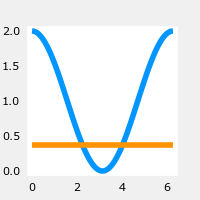

In [14]:
yhat = model.predict(X.reshape(-1,1))
fig,ax = plt.subplots(1,1, figsize=(2,2))
widgvis(fig)
ax.plot(X,y)
ax.plot(X,yhat)
plt.show()

In [15]:
yhat = model.predict(X)
yhat[0:5]

4/4 [==============================] - 0s 773us/step


array([[0.37],
       [0.37],
       [0.37],
       [0.37],
       [0.37]], dtype=float32)

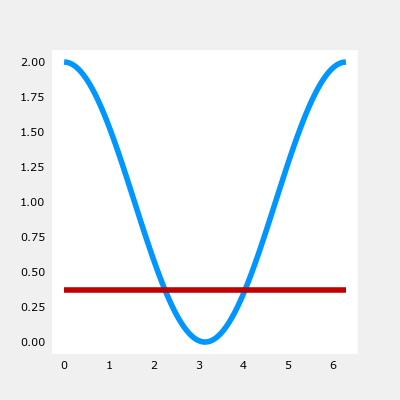

In [16]:
fig,ax = plt.subplots(1,1, figsize=(4,4))
ax.plot(X,y)
ax.plot(X,yhat, c=dlc["dldarkred"])
plt.show()

In [17]:
l1 = model.get_layer('l1')
l2 = model.get_layer('l2')

In [18]:
l1.get_weights()

[array([[-0.07]], dtype=float32), array([0.], dtype=float32)]

In [19]:
l2.get_weights()

[array([[-1.13]], dtype=float32), array([0.37], dtype=float32)]

In [20]:
l1 = model.get_layer('l1')
l2 = model.get_layer('l2')
l1.get_weights()
l2.get_weights()

w1 = np.array([[-1]])
b1 = np.array([1])
l1.set_weights([w1,b1])

w2 = np.array([[1]])
b2 = np.array([0])
l2.set_weights([w2,b2])
model.fit(
    X,y,
    epochs=100
)

Epoch 1/100
4/4 [==============================] - 0s 1ms/step - loss: 1.2370
Epoch 2/100
4/4 [==============================] - 0s 1ms/step - loss: 1.1409
Epoch 3/100
4/4 [==============================] - 0s 939us/step - loss: 1.0439
Epoch 4/100
4/4 [==============================] - 0s 891us/step - loss: 0.9407
Epoch 5/100
4/4 [==============================] - 0s 1ms/step - loss: 0.8440
Epoch 6/100
4/4 [==============================] - 0s 740us/step - loss: 0.7457
Epoch 7/100
4/4 [==============================] - 0s 720us/step - loss: 0.6603
Epoch 8/100
4/4 [==============================] - 0s 743us/step - loss: 0.5871
Epoch 9/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5356
Epoch 10/100
4/4 [==============================] - 0s 707us/step - loss: 0.5087
Epoch 11/100
4/4 [==============================] - 0s 709us/step - loss: 0.5010
Epoch 12/100
4/4 [==============================] - 0s 672us/step - loss: 0.4940
Epoch 13/100
4/4 [===========================

In [21]:
l2.set_weights([w2,b2])

4/4 [==============================] - 0s 568us/step


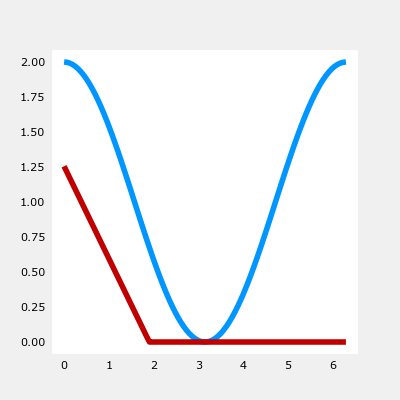

In [22]:
yhat = model.predict(X)
fig,ax = plt.subplots(1,1, figsize=(4,4))
ax.plot(X,y)
ax.plot(X,yhat, c=dlc["dldarkred"])
plt.show()

## 2-D

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import warnings
from matplotlib import cm
from matplotlib.patches import FancyArrowPatch
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.colors as colors
from lab_utils_common import dlc
dkcolors = plt.cm.Paired((1,3,7,9,5,11))
ltcolors = plt.cm.Paired((0,2,6,8,4,10))
dkcolors_map = mpl.colors.ListedColormap(dkcolors)
ltcolors_map = mpl.colors.ListedColormap(ltcolors)



In [24]:
def plt_mc_data(ax, X, y, classes,  class_labels=None, map=plt.cm.Paired, 
                legend=False, size=50, m='o', equal_xy = False):
    """ Plot multiclass data. Note, if equal_xy is True, setting ylim on the plot may not work """
    for i in range(classes):
        idx = np.where(y == i)
        col = len(idx[0])*[i]
        label = class_labels[i] if class_labels else "c{}".format(i)
        ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
                    c=col, vmin=0, vmax=map.N, cmap=map,
                    s=size, label=label)
    if legend: ax.legend()
    if equal_xy: ax.axis("equal")

def plt_mc(X_train,y_train,classes):
    css = np.unique(y_train)
    fig,ax = plt.subplots(1,1,figsize=(3,3))
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
    plt_mc_data(ax, X_train,y_train,classes, map=dkcolors_map, legend=True, size=10, equal_xy = False)
    ax.set_title("Multiclass Data")
    ax.set_xlabel("x0")
    ax.set_ylabel("x1")
    return(ax)
    
def plot_cat_decision_boundary_mc(ax, X, predict , class_labels=None, legend=False, vector=True):

    # create a mesh to points to plot
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    h = max(x_max-x_min, y_max-y_min)/200
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    points = np.c_[xx.ravel(), yy.ravel()]
    #print("points", points.shape)
    #print("xx.shape", xx.shape)

    #make predictions for each point in mesh
    if vector:
        Z = predict(points)
    else:
        Z = np.zeros((len(points),))
        for i in range(len(points)):
            Z[i] = predict(points[i].reshape(1,2))
    Z = Z.reshape(xx.shape)

    #contour plot highlights boundaries between values - classes in this case
    ax.contour(xx, yy, Z, linewidths=1) 
    #ax.axis('tight')


<AxesSubplot: title={'center': 'Multiclass Data'}, xlabel='x0', ylabel='x1'>

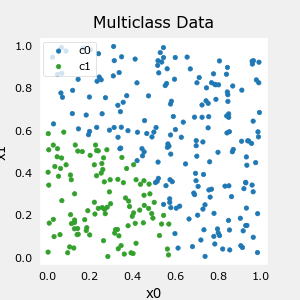

In [25]:
X = np.random.rand(300, 2)
y = np.sqrt( X[:,0]**2 + X[:,1]**2 ) < 0.6
#y = np.logical_and( X[:,0] < 0.5, X[:,1] < 0.5 ).astype(int)
y.shape
plt_mc(X,y,2,)

In [26]:
model = Sequential(
    [ 
        Dense(2,activation="relu",    name = 'l1'),
        Dense(1,activation="sigmoid", name = 'l2')
    ]
)

model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.legacy.Adam(0.01),
)

model.fit(
    X,y,
    epochs=150
)

Epoch 1/150
10/10 [==============================] - 0s 463us/step - loss: 0.2387
Epoch 2/150
10/10 [==============================] - 0s 401us/step - loss: 0.2304
Epoch 3/150
10/10 [==============================] - 0s 646us/step - loss: 0.2223
Epoch 4/150
10/10 [==============================] - 0s 488us/step - loss: 0.2158
Epoch 5/150
10/10 [==============================] - 0s 445us/step - loss: 0.2115
Epoch 6/150
10/10 [==============================] - 0s 515us/step - loss: 0.2068
Epoch 7/150
10/10 [==============================] - 0s 449us/step - loss: 0.2014
Epoch 8/150
10/10 [==============================] - 0s 546us/step - loss: 0.1952
Epoch 9/150
10/10 [==============================] - 0s 474us/step - loss: 0.1856
Epoch 10/150
10/10 [==============================] - 0s 432us/step - loss: 0.1758
Epoch 11/150
10/10 [==============================] - 0s 510us/step - loss: 0.1640
Epoch 12/150
10/10 [==============================] - 0s 456us/step - loss: 0.1534
Epoch 13/150


10/10 [==============================] - 0s 395us/step - loss: 0.0257
Epoch 100/150
10/10 [==============================] - 0s 402us/step - loss: 0.0259
Epoch 101/150
10/10 [==============================] - 0s 467us/step - loss: 0.0258
Epoch 102/150
10/10 [==============================] - 0s 429us/step - loss: 0.0255
Epoch 103/150
10/10 [==============================] - 0s 430us/step - loss: 0.0250
Epoch 104/150
10/10 [==============================] - 0s 455us/step - loss: 0.0253
Epoch 105/150
10/10 [==============================] - 0s 454us/step - loss: 0.0248
Epoch 106/150
10/10 [==============================] - 0s 382us/step - loss: 0.0247
Epoch 107/150
10/10 [==============================] - 0s 533us/step - loss: 0.0247
Epoch 108/150
10/10 [==============================] - 0s 418us/step - loss: 0.0247
Epoch 109/150
10/10 [==============================] - 0s 383us/step - loss: 0.0247
Epoch 110/150
10/10 [==============================] - 0s 456us/step - loss: 0.0240
Epoch 

1250/1250 [==============================] - 0s 215us/step


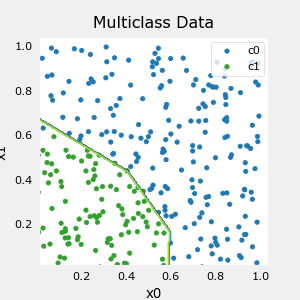

In [27]:
ax = plt_mc(X,y,2,)
predict = lambda  x: (model.predict(x) > 0.5).astype(int)
plot_cat_decision_boundary_mc(ax, X, predict, legend = True, vector=True)

In [28]:
l1 = model.get_layer("l1")
W1,b1 = l1.get_weights()
l2 = model.get_layer("l2")
W2,b2 = l2.get_weights()
print(W1,b1)
print(W2,b2)

[[ 1.66  3.4 ]
 [ 2.79 -0.12]] [-1.45 -1.33]
[[-7.01]
 [-4.6 ]] [3.1]


In [29]:
x0 = np.array([0.4,0.60])
np.dot( np.dot(x0,W1) + b1, W2) + b2

array([-2.91])

In [30]:
## Example

(500, 2) MiniBatchKMeans(n_clusters=3)
(500, 2) AffinityPropagation(damping=0.9, preference=-200, random_state=0)
(500, 2) MeanShift(bandwidth=1.321267758400405, bin_seeding=True)
(500, 2) SpectralClustering(affinity='nearest_neighbors', eigen_solver='arpack',
                   n_clusters=3)
(500, 2) AgglomerativeClustering(connectivity=<500x500 sparse matrix of type '<class 'numpy.float64'>'
	with 1892 stored elements in Compressed Sparse Row format>,
                        n_clusters=3)
(500, 2) AgglomerativeClustering(affinity='cityblock',
                        connectivity=<500x500 sparse matrix of type '<class 'numpy.float64'>'
	with 1892 stored elements in Compressed Sparse Row format>,
                        linkage='average', n_clusters=3)
(500, 2) DBSCAN(eps=0.3)
(500, 2) OPTICS(min_cluster_size=0.1, min_samples=7)
(500, 2) Birch()
(500, 2) GaussianMixture(n_components=3)


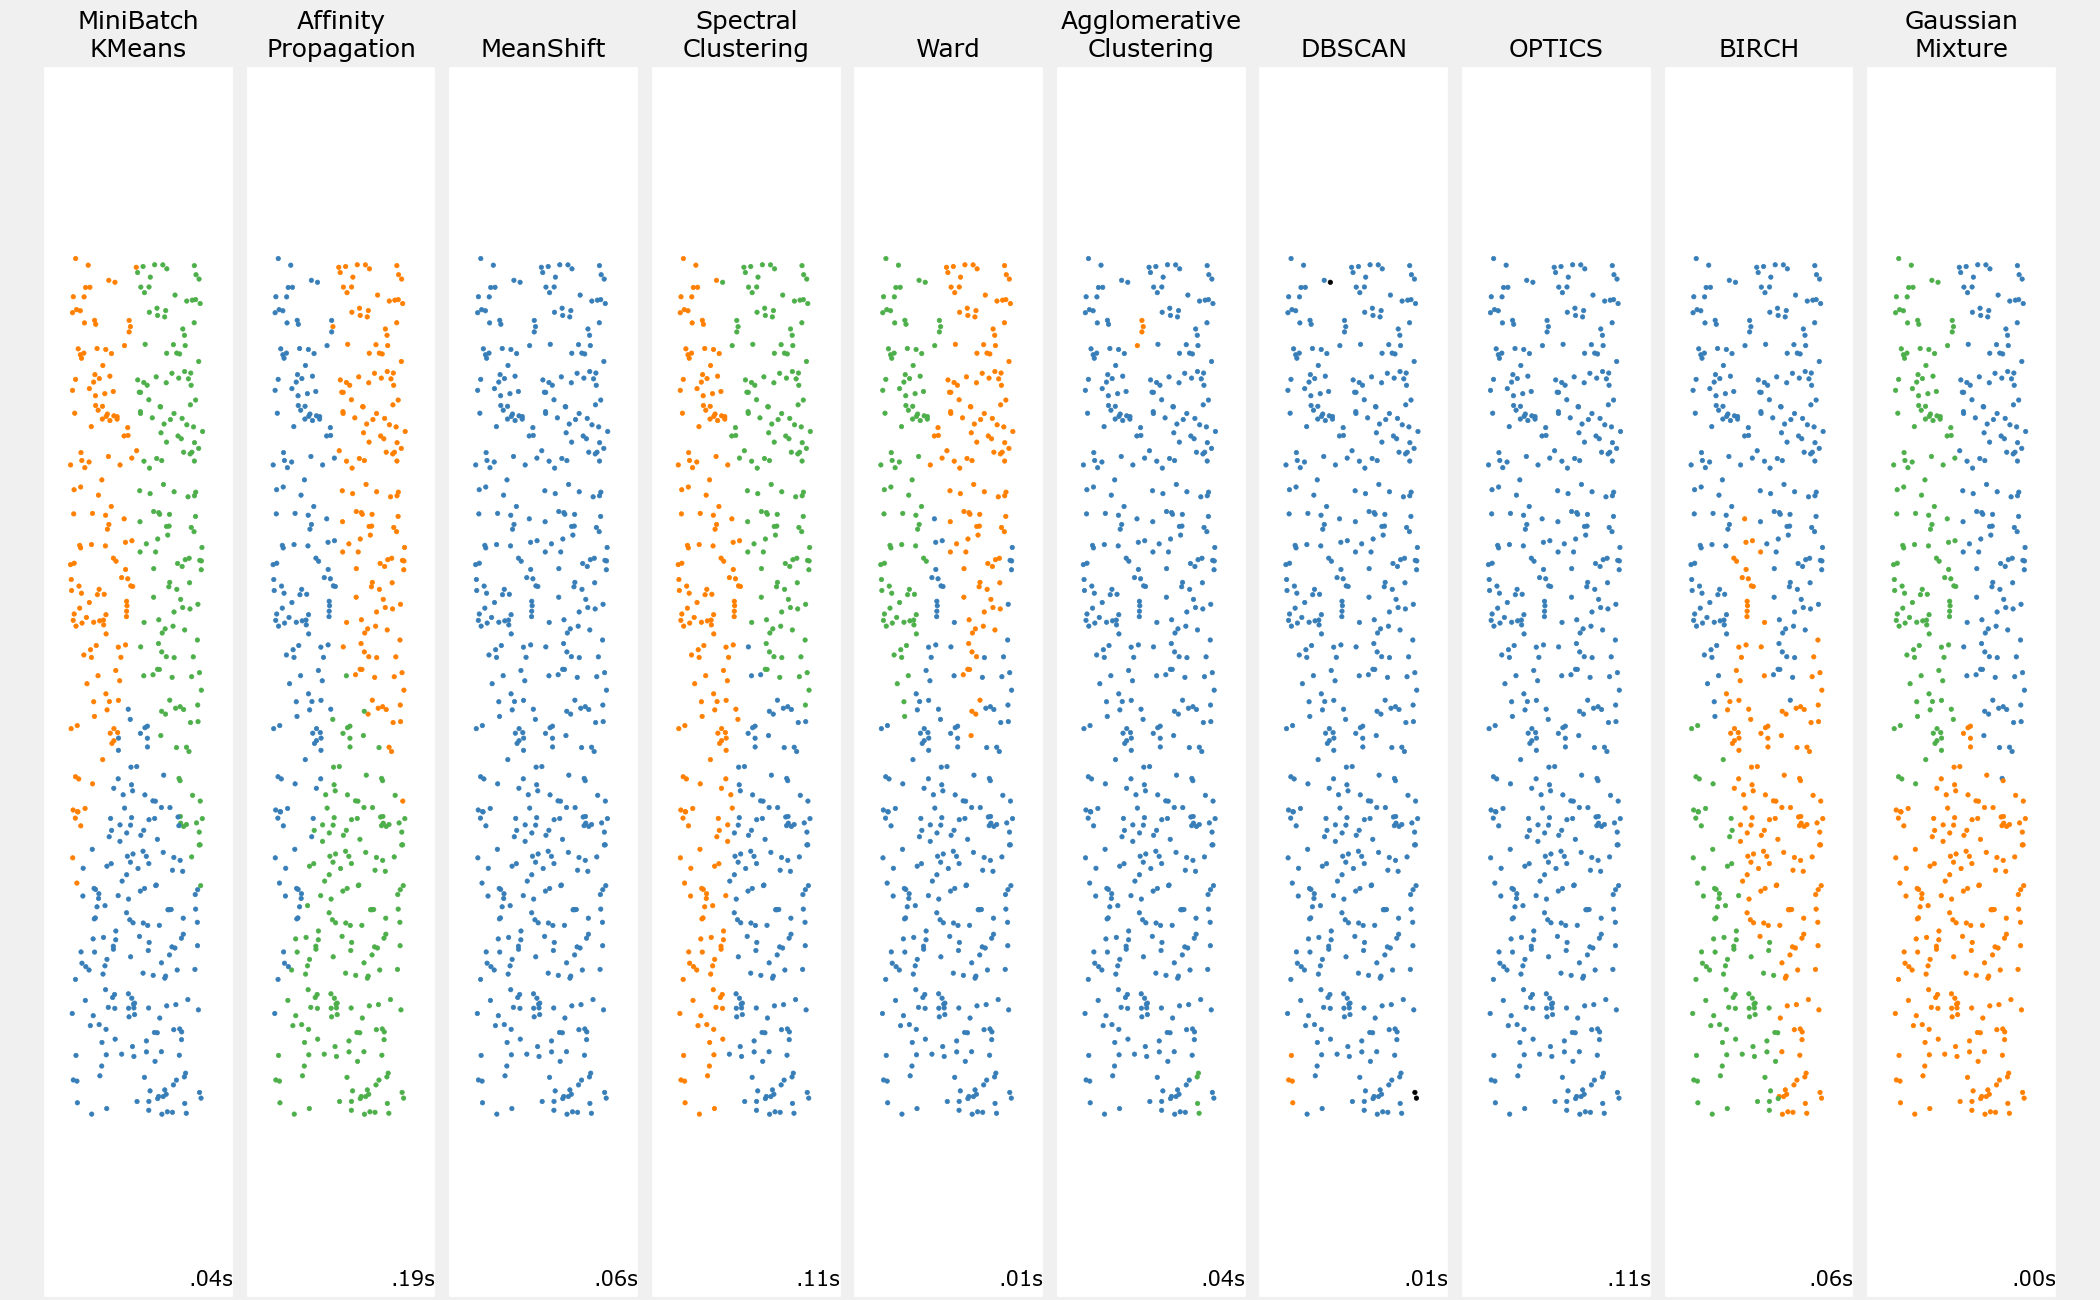

In [31]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {
    "quantile": 0.3,
    "eps": 0.3,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 3,
    "n_clusters": 3,
    "min_samples": 7,
    "xi": 0.05,
    "min_cluster_size": 0.1,
}

datasets = [
    (
        noisy_circles,
        {
            "damping": 0.77,
            "preference": -240,
            "quantile": 0.2,
            "n_clusters": 2,
            "min_samples": 7,
            "xi": 0.08,
        },
    ),
    (
        noisy_moons,
        {
            "damping": 0.75,
            "preference": -220,
            "n_clusters": 2,
            "min_samples": 7,
            "xi": 0.1,
        },
    ),
    (
        varied,
        {
            "eps": 0.18,
            "n_neighbors": 2,
            "min_samples": 7,
            "xi": 0.01,
            "min_cluster_size": 0.2,
        },
    ),
    (
        aniso,
        {
            "eps": 0.15,
            "n_neighbors": 2,
            "min_samples": 7,
            "xi": 0.1,
            "min_cluster_size": 0.2,
        },
    ),
    (blobs, {"min_samples": 7, "xi": 0.1, "min_cluster_size": 0.2}),
    (no_structure, {}),
]

datasets = [
    (no_structure, {}),
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params["quantile"])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params["n_neighbors"], include_self=False
    )
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params["n_clusters"])
    ward = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="ward", connectivity=connectivity
    )
    spectral = cluster.SpectralClustering(
        n_clusters=params["n_clusters"],
        eigen_solver="arpack",
        affinity="nearest_neighbors",
    )
    dbscan = cluster.DBSCAN(eps=params["eps"])
    optics = cluster.OPTICS(
        min_samples=params["min_samples"],
        xi=params["xi"],
        min_cluster_size=params["min_cluster_size"],
    )
    affinity_propagation = cluster.AffinityPropagation(
        damping=params["damping"], preference=params["preference"], random_state=0
    )
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average",
        affinity="cityblock",
        n_clusters=params["n_clusters"],
        connectivity=connectivity,
    )
    birch = cluster.Birch(n_clusters=params["n_clusters"])
    gmm = mixture.GaussianMixture(
        n_components=params["n_clusters"], covariance_type="full"
    )

    clustering_algorithms = (
        ("MiniBatch\nKMeans", two_means),
        ("Affinity\nPropagation", affinity_propagation),
        ("MeanShift", ms),
        ("Spectral\nClustering", spectral),
        ("Ward", ward),
        ("Agglomerative\nClustering", average_linkage),
        ("DBSCAN", dbscan),
        ("OPTICS", optics),
        ("BIRCH", birch),
        ("Gaussian\nMixture", gmm),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the "
                + "connectivity matrix is [0-9]{1,2}"
                + " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning,
            )
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding"
                + " may not work as expected.",
                category=UserWarning,
            )
            print(X.shape,algorithm)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, "labels_"):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(y_pred) + 1),
                )
            )
        )
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
        plot_num += 1

plt.show()